In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from keras.utils import np_utils
from sklearn import metrics
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
import collections, numpy
import matplotlib.pyplot as plt

In [3]:
#load in the data set: 
jazz = pd.read_csv("data/jazz_csv.csv")
classical = pd.read_csv("data/classical_csv.csv")
country = pd.read_csv("data/country_csv.csv")
edm = pd.read_csv("data/edm_csv.csv")
rap = pd.read_csv("data/rap_csv.csv")
rock = pd.read_csv("data/rock_csv.csv")

In [4]:
count = 0
features = []
genres = []
dataframes = {1:jazz, 2: classical, 3:country, 4:edm, 5: rap, 6: rock} #map genre dfs to index
for genre, dataframe in dataframes.items():
    count = 0
    for ind, row in dataframe.iterrows():
        count+=1
        features.append([row["acousticness"], row["danceability"], row["energy"],row["loudness"],row["speechiness"], row["tempo"], row["valence"]])
        genres.append(genre)

In [5]:
y = genres #set the y to the numerical genre output
X = features #set X to the features 

In [6]:
genres_dict = {1: "jazz", 2: "classical", 3: "country" , 4: "edm" , 5: "rap", 6: "rock"} #init dict
genres_dict_reverse = {"jazz":0, "classical":1, "country":2 , "edm":3 , "rap":4, "rock":5}

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21) #split the training and test sets 

In [8]:
scaler = StandardScaler() #use a standard scaler 
X_train = scaler.fit_transform(X_train) #fit the data
X_test = scaler.transform(X_test)
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = None) #use scipy random forest classifier 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [9]:
ctr = 0 #init ctrs to get the individual genre accuracies 
jazz_ctr, classical_ctr, country_ctr, edm_ctr , rap_ctr , rock_ctr = 0, 0, 0, 0, 0, 0
jazz_total, classical_total, country_total, edm_total, rap_total, rock_total = 0, 0, 0, 0, 0, 0
total_percent_wrong, wrong = 0, 0

In [10]:
y_pred_prob = classifier.predict_proba(X_test)

In [11]:
y_pred_prob[3]

array([0.15 , 0.   , 0.07 , 0.515, 0.065, 0.2  ])

In [12]:
expected =[]
predicted = []
for i in range(0,len(y_test)): #calc accuracies 
    genre_expected = genres_dict[y_test[i]]
    genre_predicted = genres_dict[y_pred[i]]
    expected.append(genre_expected)
    predicted.append(genre_predicted)
    print("predicted: ", genre_predicted , "expected: ", genre_expected)
    if genre_expected == 'jazz': 
        jazz_total+=1
    elif genre_expected== 'classical':
        classical_total+=1
    elif genre_expected=='country':
        country_total+=1
    elif genre_expected=='edm':
        edm_total+=1
    elif genre_expected== 'rap':
        rap_total+=1
    elif genre_expected== 'rock':
        
        rock_total+=1
    if genre_predicted==genre_expected: 
        ctr+=1
        if genre_predicted == 'jazz':
            jazz_ctr+=1
        elif genre_predicted== 'classical':
            classical_ctr+=1
        elif genre_predicted=='country':
            country_ctr+=1
        elif genre_predicted=='edm':
            edm_ctr+=1
        elif genre_predicted== 'rap':
            rap_ctr+=1
        elif genre_predicted == 'rock':
            
            rock_ctr+=1
    else:
        wrong+=1
        percent_expected = y_pred_prob[i][genres_dict_reverse[genre_expected]]
        percent_predicted =  y_pred_prob[i][genres_dict_reverse[genre_predicted]]
        print("model probability of genre expected: ", genre_expected, percent_expected, 
              "prob of genre predicted: ", genre_predicted,percent_predicted)
        total_percent_wrong += ((percent_predicted - percent_expected))
 

predicted:  country expected:  edm
model probability of genre expected:  edm 0.075 prob of genre predicted:  country 0.6
predicted:  classical expected:  classical
predicted:  rock expected:  jazz
model probability of genre expected:  jazz 0.07 prob of genre predicted:  rock 0.515
predicted:  edm expected:  country
model probability of genre expected:  country 0.07 prob of genre predicted:  edm 0.515
predicted:  rap expected:  rap
predicted:  rock expected:  country
model probability of genre expected:  country 0.145 prob of genre predicted:  rock 0.57
predicted:  edm expected:  edm
predicted:  jazz expected:  jazz
predicted:  classical expected:  classical
predicted:  rock expected:  edm
model probability of genre expected:  edm 0.34 prob of genre predicted:  rock 0.39
predicted:  edm expected:  edm
predicted:  jazz expected:  country
model probability of genre expected:  country 0.195 prob of genre predicted:  jazz 0.38
predicted:  country expected:  country
predicted:  classical exp

predicted:  country expected:  country
predicted:  edm expected:  rap
model probability of genre expected:  rap 0.21 prob of genre predicted:  edm 0.745
predicted:  country expected:  country
predicted:  rap expected:  rap
predicted:  rap expected:  edm
model probability of genre expected:  edm 0.39 prob of genre predicted:  rap 0.455
predicted:  country expected:  country
predicted:  country expected:  country
predicted:  edm expected:  rap
model probability of genre expected:  rap 0.14 prob of genre predicted:  edm 0.495
predicted:  country expected:  country
predicted:  classical expected:  classical
predicted:  rock expected:  rock
predicted:  edm expected:  edm
predicted:  jazz expected:  jazz
predicted:  rap expected:  edm
model probability of genre expected:  edm 0.34 prob of genre predicted:  rap 0.58
predicted:  country expected:  rock
model probability of genre expected:  rock 0.175 prob of genre predicted:  country 0.575
predicted:  classical expected:  classical
predicted: 

model probability of genre expected:  rock 0.24416666666666667 prob of genre predicted:  jazz 0.585
predicted:  jazz expected:  jazz
predicted:  edm expected:  rap
model probability of genre expected:  rap 0.215 prob of genre predicted:  edm 0.66
predicted:  country expected:  jazz
model probability of genre expected:  jazz 0.15 prob of genre predicted:  country 0.58
predicted:  rock expected:  rock
predicted:  rock expected:  rock
predicted:  rap expected:  rap
predicted:  country expected:  country
predicted:  country expected:  rock
model probability of genre expected:  rock 0.30333333333333334 prob of genre predicted:  country 0.3866666666666667
predicted:  edm expected:  rap
model probability of genre expected:  rap 0.23 prob of genre predicted:  edm 0.67
predicted:  country expected:  country
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  rock expected:  rock
predicted:  classical expected:  classical
predict

model probability of genre expected:  country 0.435 prob of genre predicted:  rock 0.465
predicted:  rock expected:  rock
predicted:  jazz expected:  jazz
predicted:  rock expected:  rock
predicted:  edm expected:  edm
predicted:  rock expected:  rock
predicted:  jazz expected:  country
model probability of genre expected:  country 0.045 prob of genre predicted:  jazz 0.75
predicted:  country expected:  rock
model probability of genre expected:  rock 0.39 prob of genre predicted:  country 0.405
predicted:  jazz expected:  jazz
predicted:  rock expected:  rock
predicted:  classical expected:  jazz
model probability of genre expected:  jazz 0.48 prob of genre predicted:  classical 0.5
predicted:  edm expected:  edm
predicted:  classical expected:  classical
predicted:  jazz expected:  rock
model probability of genre expected:  rock 0.295 prob of genre predicted:  jazz 0.605
predicted:  classical expected:  classical
predicted:  classical expected:  classical
predicted:  rock expected:  r

predicted:  rap expected:  rap
predicted:  rock expected:  rock
predicted:  rap expected:  rap
predicted:  jazz expected:  jazz
predicted:  country expected:  country
predicted:  rap expected:  rock
model probability of genre expected:  rock 0.06 prob of genre predicted:  rap 0.805
predicted:  country expected:  country
predicted:  jazz expected:  classical
model probability of genre expected:  classical 0.465 prob of genre predicted:  jazz 0.465
predicted:  jazz expected:  country
model probability of genre expected:  country 0.035 prob of genre predicted:  jazz 0.855
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  rock expected:  rock
predicted:  country expected:  country
predicted:  rap expected:  edm
model probability of genre expected:  edm 0.165 prob of genre predicted:  rap 0.78
predicted:  jazz expected:  jazz
predicted:  country expected:  country
predicted:  country expected:  rock
model probability of genre expected:  rock 0.35 prob of 

model probability of genre expected:  rap 0.07 prob of genre predicted:  edm 0.67
predicted:  jazz expected:  jazz
predicted:  country expected:  edm
model probability of genre expected:  edm 0.385 prob of genre predicted:  country 0.5
predicted:  jazz expected:  classical
model probability of genre expected:  classical 0.185 prob of genre predicted:  jazz 0.55
predicted:  rock expected:  rock
predicted:  rap expected:  rap
predicted:  jazz expected:  jazz
predicted:  edm expected:  edm
predicted:  edm expected:  rap
model probability of genre expected:  rap 0.145 prob of genre predicted:  edm 0.245
predicted:  rap expected:  rap
predicted:  rap expected:  rap
predicted:  country expected:  country
predicted:  classical expected:  classical
predicted:  rap expected:  rap
predicted:  rap expected:  edm
model probability of genre expected:  edm 0.145 prob of genre predicted:  rap 0.855
predicted:  edm expected:  edm
predicted:  country expected:  country
predicted:  edm expected:  edm
pr

predicted:  classical expected:  classical
predicted:  edm expected:  edm
predicted:  rock expected:  rock
predicted:  jazz expected:  jazz
predicted:  edm expected:  edm
predicted:  country expected:  country
predicted:  classical expected:  classical
predicted:  rap expected:  jazz
model probability of genre expected:  jazz 0.01 prob of genre predicted:  rap 0.855
predicted:  rap expected:  jazz
model probability of genre expected:  jazz 0.005 prob of genre predicted:  rap 0.965
predicted:  country expected:  edm
model probability of genre expected:  edm 0.17 prob of genre predicted:  country 0.5931547619047618
predicted:  rock expected:  rock
predicted:  rap expected:  rap
predicted:  jazz expected:  rock
model probability of genre expected:  rock 0.355 prob of genre predicted:  jazz 0.375
predicted:  classical expected:  rock
model probability of genre expected:  rock 0.015 prob of genre predicted:  classical 0.835
predicted:  classical expected:  classical
predicted:  jazz expecte

predicted:  rock expected:  jazz
model probability of genre expected:  jazz 0.23 prob of genre predicted:  rock 0.265
predicted:  classical expected:  classical
predicted:  country expected:  rock
model probability of genre expected:  rock 0.15 prob of genre predicted:  country 0.78
predicted:  country expected:  country
predicted:  classical expected:  classical
predicted:  edm expected:  edm
predicted:  rap expected:  country
model probability of genre expected:  country 0.225 prob of genre predicted:  rap 0.39
predicted:  classical expected:  classical
predicted:  edm expected:  rock
model probability of genre expected:  rock 0.315 prob of genre predicted:  edm 0.565
predicted:  rap expected:  rap
predicted:  country expected:  country
predicted:  edm expected:  country
model probability of genre expected:  country 0.15833333333333333 prob of genre predicted:  edm 0.585
predicted:  country expected:  country
predicted:  country expected:  country
predicted:  jazz expected:  jazz
pre

model probability of genre expected:  jazz 0.11 prob of genre predicted:  classical 0.89
predicted:  classical expected:  classical
predicted:  rock expected:  rock
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  jazz expected:  jazz
predicted:  country expected:  jazz
model probability of genre expected:  jazz 0.19 prob of genre predicted:  country 0.48
predicted:  rock expected:  rock
predicted:  edm expected:  edm
predicted:  jazz expected:  jazz
predicted:  classical expected:  jazz
model probability of genre expected:  jazz 0.43 prob of genre predicted:  classical 0.535
predicted:  country expected:  country
predicted:  edm expected:  rock
model probability of genre expected:  rock 0.3021666666666667 prob of genre predicted:  edm 0.3778333333333334
predicted:  edm expected:  edm
predicted:  rap expected:  rap
predicted:  edm expected:  edm
predicted:  jazz expected:  jazz
predicted:  rock expected:  rock
predic

predicted:  rap expected:  rap
predicted:  rap expected:  rap
predicted:  classical expected:  jazz
model probability of genre expected:  jazz 0.235 prob of genre predicted:  classical 0.595
predicted:  country expected:  country
predicted:  rap expected:  rap
predicted:  classical expected:  jazz
model probability of genre expected:  jazz 0.24 prob of genre predicted:  classical 0.76
predicted:  rap expected:  rap
predicted:  rock expected:  rock
predicted:  rock expected:  jazz
model probability of genre expected:  jazz 0.36 prob of genre predicted:  rock 0.55
predicted:  country expected:  rock
model probability of genre expected:  rock 0.04 prob of genre predicted:  country 0.85
predicted:  country expected:  country
predicted:  rap expected:  edm
model probability of genre expected:  edm 0.38 prob of genre predicted:  rap 0.565
predicted:  rap expected:  rap
predicted:  rap expected:  rock
model probability of genre expected:  rock 0.1625 prob of genre predicted:  rap 0.6075
predi

predicted:  edm expected:  rock
model probability of genre expected:  rock 0.29 prob of genre predicted:  edm 0.5866666666666667
predicted:  classical expected:  classical
predicted:  jazz expected:  classical
model probability of genre expected:  classical 0.435 prob of genre predicted:  jazz 0.54
predicted:  edm expected:  edm
predicted:  rap expected:  edm
model probability of genre expected:  edm 0.34 prob of genre predicted:  rap 0.61
predicted:  edm expected:  rap
model probability of genre expected:  rap 0.05 prob of genre predicted:  edm 0.505
predicted:  jazz expected:  country
model probability of genre expected:  country 0.22166666666666668 prob of genre predicted:  jazz 0.645
predicted:  edm expected:  edm
predicted:  classical expected:  classical
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  rock expected:  rock
predicted:  rock expected:  rock
predicted:  classical expected:  classical
predicted:  country expected:  rock
model prob

predicted:  edm expected:  edm
predicted:  country expected:  rock
model probability of genre expected:  rock 0.39 prob of genre predicted:  country 0.535
predicted:  rock expected:  edm
model probability of genre expected:  edm 0.305 prob of genre predicted:  rock 0.385
predicted:  classical expected:  classical
predicted:  country expected:  edm
model probability of genre expected:  edm 0.17 prob of genre predicted:  country 0.65
predicted:  rock expected:  edm
model probability of genre expected:  edm 0.32 prob of genre predicted:  rock 0.545
predicted:  classical expected:  jazz
model probability of genre expected:  jazz 0.265 prob of genre predicted:  classical 0.73
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  classical expected:  jazz
model probability of genre expected:  jazz 0.22 prob of genre predicted:  classical 0.52
predicted:  jazz expected:  jazz
predicted:  jazz expected:  jazz
predicted:  edm expe

predicted:  rap expected:  rap
predicted:  rock expected:  rock
predicted:  rock expected:  rock
predicted:  edm expected:  edm
predicted:  classical expected:  classical
predicted:  classical expected:  classical
predicted:  country expected:  country
predicted:  country expected:  rock
model probability of genre expected:  rock 0.22 prob of genre predicted:  country 0.53
predicted:  classical expected:  classical
predicted:  country expected:  country
predicted:  classical expected:  classical
predicted:  rap expected:  edm
model probability of genre expected:  edm 0.345 prob of genre predicted:  rap 0.6125
predicted:  rap expected:  rap
predicted:  rap expected:  rap
predicted:  rap expected:  rap
predicted:  jazz expected:  jazz
predicted:  rap expected:  rap
predicted:  rock expected:  rock
predicted:  edm expected:  edm
predicted:  country expected:  country
predicted:  country expected:  rock
model probability of genre expected:  rock 0.25 prob of genre predicted:  country 0.665

predicted:  rock expected:  rock
predicted:  country expected:  edm
model probability of genre expected:  edm 0.36 prob of genre predicted:  country 0.405
predicted:  country expected:  country
predicted:  jazz expected:  jazz
predicted:  edm expected:  edm
predicted:  edm expected:  country
model probability of genre expected:  country 0.16 prob of genre predicted:  edm 0.57
predicted:  jazz expected:  jazz
predicted:  country expected:  country
predicted:  classical expected:  classical
predicted:  classical expected:  classical
predicted:  country expected:  country
predicted:  rap expected:  rap
predicted:  rap expected:  rap
predicted:  edm expected:  edm
predicted:  country expected:  rock
model probability of genre expected:  rock 0.35 prob of genre predicted:  country 0.49
predicted:  edm expected:  edm
predicted:  rap expected:  rap
predicted:  jazz expected:  jazz
predicted:  jazz expected:  rock
model probability of genre expected:  rock 0.25 prob of genre predicted:  jazz 0

predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  classical expected:  classical
predicted:  country expected:  edm
model probability of genre expected:  edm 0.3 prob of genre predicted:  country 0.42
predicted:  rock expected:  rock
predicted:  rock expected:  edm
model probability of genre expected:  edm 0.34 prob of genre predicted:  rock 0.54
predicted:  jazz expected:  country
model probability of genre expected:  country 0.1 prob of genre predicted:  jazz 0.355
predicted:  rap expected:  rap
predicted:  rock expected:  rock
predicted:  edm expected:  edm
predicted:  jazz expected:  rock
model probability of genre expected:  rock 0.295 prob of genre predicted:  jazz 0.565
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  country expected:  country
predicted:  rap expected:  edm
model probability of genre expected:  edm 0.14 prob of genre predicted:  rap 0.73
predicted:  country expected:  jazz
model probab

predicted:  jazz expected:  jazz
predicted:  edm expected:  edm
predicted:  classical expected:  jazz
model probability of genre expected:  jazz 0.02 prob of genre predicted:  classical 0.98
predicted:  jazz expected:  jazz
predicted:  classical expected:  classical
predicted:  rock expected:  rock
predicted:  rock expected:  jazz
model probability of genre expected:  jazz 0.245 prob of genre predicted:  rock 0.51
predicted:  edm expected:  edm
predicted:  classical expected:  classical
predicted:  rock expected:  rock
predicted:  rap expected:  rap
predicted:  rap expected:  rap
predicted:  jazz expected:  classical
model probability of genre expected:  classical 0.235 prob of genre predicted:  jazz 0.75
predicted:  rock expected:  rock
predicted:  jazz expected:  jazz
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  classical expected:  classical
predicted:  classical expected:  classical
predicted:  country expected:  country
predicted:  jazz e

predicted:  edm expected:  edm
predicted:  edm expected:  edm
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  rap expected:  rap
predicted:  edm expected:  edm
predicted:  edm expected:  rock
model probability of genre expected:  rock 0.38 prob of genre predicted:  edm 0.39
predicted:  rock expected:  rock
predicted:  edm expected:  edm
predicted:  rap expected:  rap
predicted:  country expected:  country
predicted:  country expected:  country
predicted:  rap expected:  rap
predicted:  rap expected:  rap
predicted:  country expected:  country
predicted:  classical expected:  classical
predicted:  rock expected:  country
model probability of genre expected:  country 0.305 prob of genre predicted:  rock 0.415
predicted:  rock expected:  rock
predicted:  classical expected:  classical
predicted:  country expected:  country
predicted:  rock expected:  rock
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  jazz ex

In [13]:
print("jazz acc: ", jazz_ctr/jazz_total)
print("country acc: ", country_ctr/country_total)
print("rock acc: ", rock_ctr/rock_total)
print("rap acc: ", rap_ctr/rap_total)
print("classical acc: ", classical_ctr/classical_total)
print("edm acc: ", edm_ctr/edm_total)
print("overall acc: ", ctr/len(y_test))

jazz acc:  0.7606837606837606
country acc:  0.77079107505071
rock acc:  0.6341948310139165
rap acc:  0.82
classical acc:  0.8975791433891993
edm acc:  0.6936416184971098
overall acc:  0.763787057698438


In [14]:
total_percent_wrong/wrong #the average percent that is different in the predictor when the model mispredicts

0.3413654167469956

In [19]:
#creating a confusion matrix to visualize the results
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Genre')
    plt.xlabel('Predicted Genre')
    plt.tight_layout()

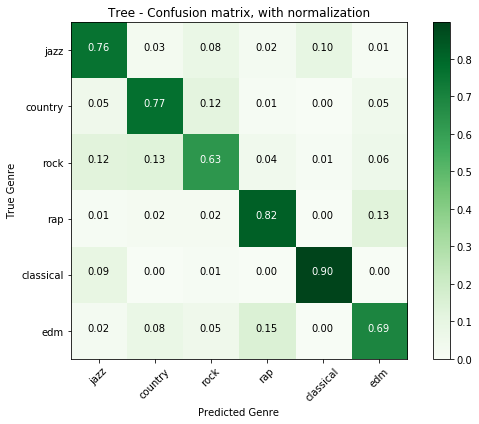

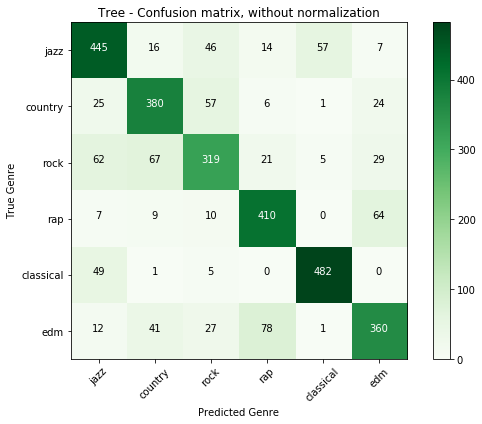

In [21]:
cnf_matrix = confusion_matrix(expected, predicted, labels=['jazz', 'country', 'rock', 'rap', 'classical', 'edm'])
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['jazz', 'country', 'rock', 'rap', 'classical', 'edm'],
                      title='Tree - Confusion matrix, with normalization')
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['jazz', 'country', 'rock', 'rap', 'classical', 'edm'],normalize= False,
                      title='Tree - Confusion matrix, without normalization')

In [ ]:
estimator = classifier.estimators_[3]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = ["acousticness","danceability", "energy", "loudness", "speechiness", "tempo", "valence"] ,   
                class_names = ["jazz", "classical", "country" , "edm" , "rap","rock"],
                rounded = True, 
                proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')